# Parte 2:

## Dado os sistemas do slide 08 da apresentação 05 – Sistemas Realimentados:

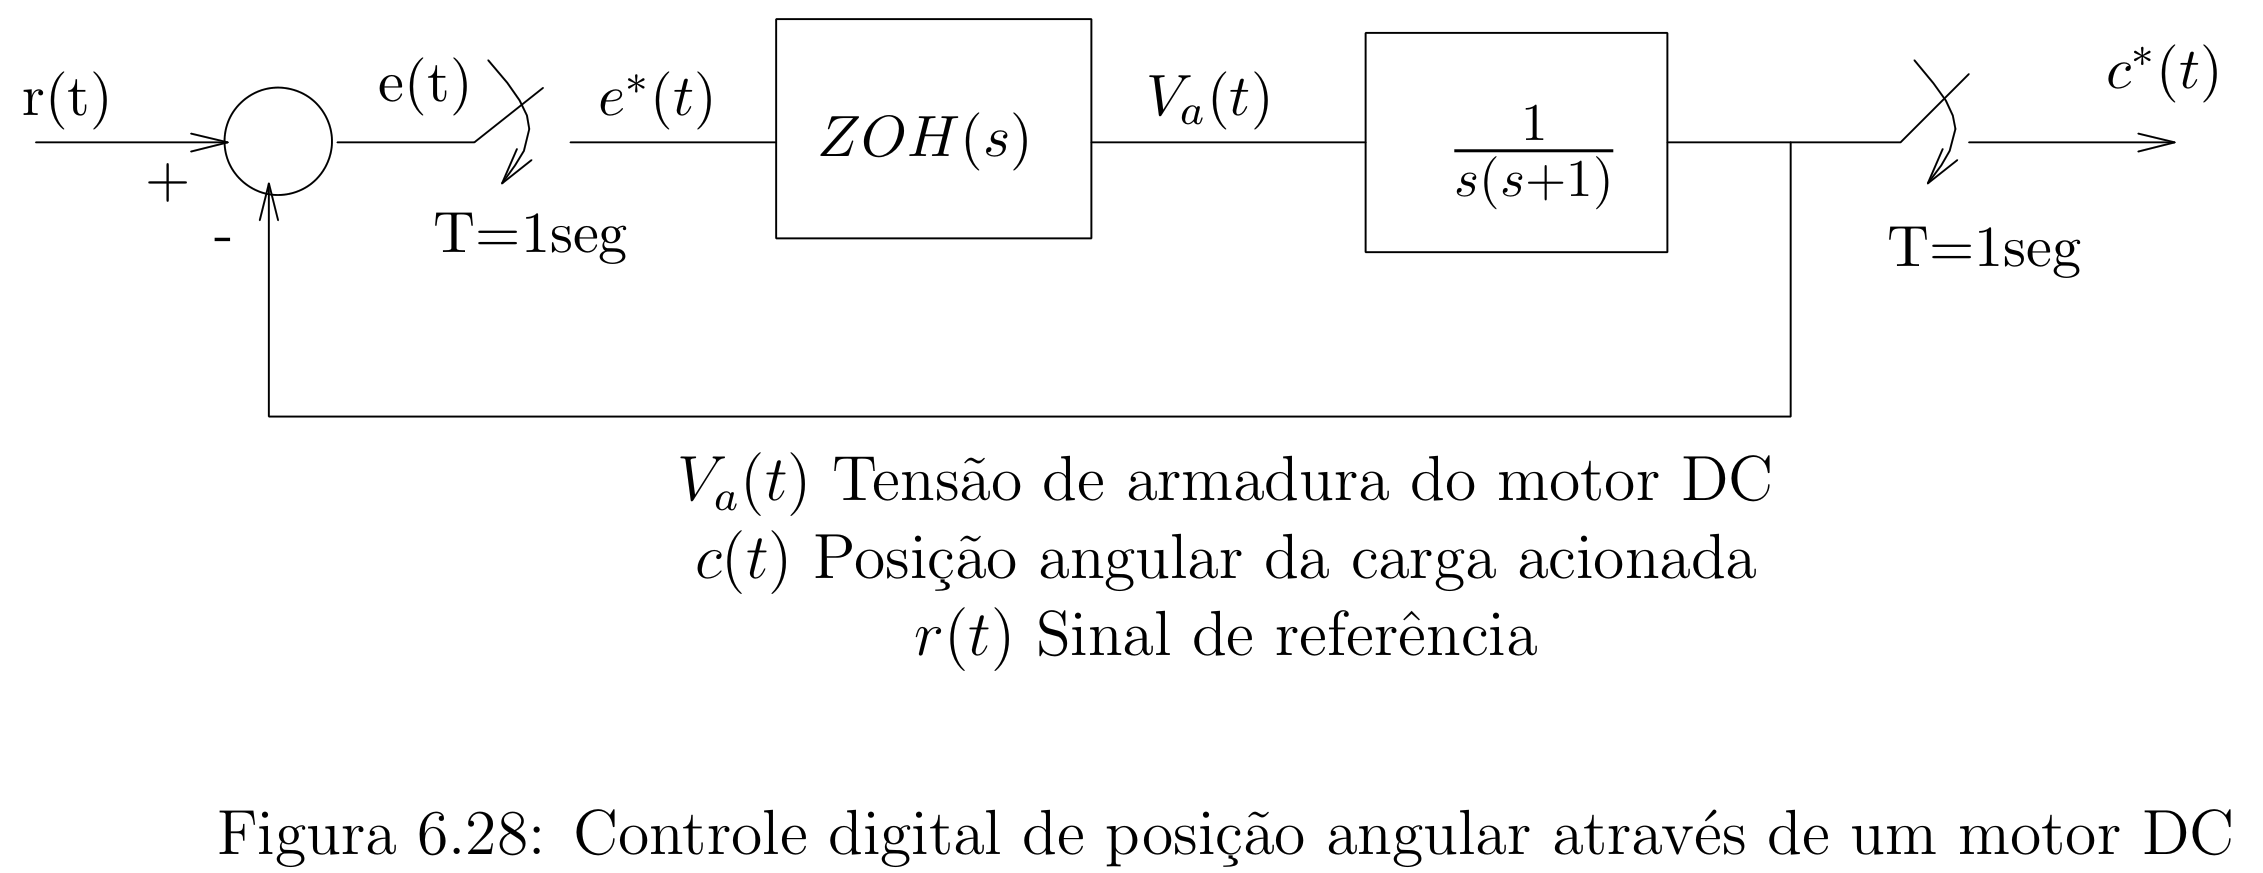

## Com o Matlab ou equivalente:

- Obtenha a função de transferência discreta equivalente de malha fechada;
- Verifique a resposta do sistema para uma entrada do tipo degrau unitário com a função step;
- Obtenha a equação recursiva do sistema em malha fechada;
- Verifique a resposta do sistema para uma entrada do tipo degrau unitário utilizando a equação recursiva em malha fechada;
- Obtenha a equação recursiva da função de transferência de ramo direto G(z);
- Verifique a resposta do sistema para uma entrada do tipo degrau unitário utilizando a equação recursiva de G(z) e do somador;
- Compare as respostas

In [1]:
import numpy as np
import lcapy as lcp
from lcapy import t, s
from lcapy.discretetime import n, z       # Pacote localizado em https://pypi.org/project/lcapy/
                                          # e documentação em https://lcapy.readthedocs.io/en/latest/
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'})

# 1. Obter a função de transferência discreta equivalente de malha fechada:

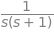

In [2]:
# Função de tranferência F(s)=(C(s)/Va(s)):
F = lcp.expr('1/(s*(s+1))');
F

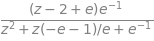

In [3]:
# Função de tranferência G(z):
f = (F/s)(t);
Fz = (f(n))(z);
Gz = (1-z**-1)*Fz;
Gz = Gz.canonical();
Gz

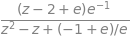

In [4]:
# Função de tranferência de malha fechada:
FTMF = Gz/(1+Gz);
FTMF = (FTMF.cancel()).canonical();
FTMF

# 2. Obter a resposta do sistema para uma entrada do tipo degrau unitário:

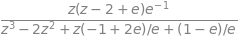

In [5]:
# Resposta C(z) à entrada R(z):
R = lcp.expr('z/(z-1)');
C = FTMF*R;
C = C.canonical();
C

# 3. Obter a equação recursiva do sistema em malha fechada:

<font size="3">
\begin{align*}
C(z) &= FTMF(z) \cdot R(z) \\
C(z) &= \left[ \frac{G(z)}{1 + \left( G \cdot H \right) (z)} \right] \cdot R(z) \\
C(z) &= \left[ \frac{e^{-1} \cdot z + 1 - 2 \cdot e^{-1}}{z^{2} - z + 1-e^{-1}} \right] \cdot R(z) \\
C(z) \cdot \left( z^{2} - z + 1 - e^{-1} \right) &= R(z) \cdot \left( e^{-1} \cdot z + 1 - 2 \cdot e^{-1} \right) \\
z^{2} \cdot C(z) - z \cdot C(z) + \left( 1 - e^{-1} \right) \cdot C(z) &=  e^{-1} \cdot z \cdot R(z) + \left( 1 - 2 \cdot e^{-1} \right) \cdot R(z) \\
\mathcal{Z^{-1}} \left[ z^{2} \cdot C(z) - z \cdot C(z) + \left( 1 - e^{-1} \right) \cdot C(z) \right] &= \mathcal{Z^{-1}} \left[ e^{-1} \cdot z \cdot R(z) + \left( 1 - 2 \cdot e^{-1} \right) \cdot R(z) \right] \\
c(k + 2) - c(k + 1) + \left(1 - e^{-1} \right) \cdot c(k) &= e^{-1} \cdot r(k + 1) + \left( 1 - 2 \cdot e^{-1} \right) \cdot r(k) \\
c(k + 2) &= c(k + 1) - \left(1 - e^{-1} \right) \cdot c(k) + e^{-1} \cdot r(k + 1) + \left( 1 - 2 \cdot e^{-1} \right) \cdot r(k) \\
c(k + 2) &= c(k + 1) - a \cdot c(k) + b_{1} \cdot r(k + 1) + b_{2} \cdot r(k)
\end{align*}
</font>

# 4. Obter a equação recursiva do ramo direto de G(z):

<font size="3">
\begin{align*}
C(z) &= G(z) \cdot E(z) \\
C(z) &= \left[ \frac{e^{-1} \cdot z + 1 - 2 \cdot e^{-1}}{z^{2} - \left( 1 + e^{-1} \right) \cdot z + e^{-1}} \right] \cdot E(z) \\
C(z) \cdot \left[ z^{2} - \left( 1 + e^{-1} \right) \cdot z + e^{-1} \right] &= E(z) \cdot \left( e^{-1} \cdot z + 1 - 2 \cdot e^{-1} \right) \\
z^{2} \cdot C(z) - \left( 1 + e^{-1} \right) \cdot z \cdot C(z) + e^{-1} \cdot C(z) &=  e^{-1} \cdot z \cdot E(z) + \left( 1 - 2 \cdot e^{-1} \right) \cdot E(z) \\
\mathcal{Z^{-1}} \left[ z^{2} \cdot C(z) - \left( 1 + e^{-1} \right) \cdot z \cdot C(z) + e^{-1} \cdot C(z) \right] &= \mathcal{Z^{-1}} \left[ e^{-1} \cdot z \cdot E(z) + \left( 1 - 2 \cdot e^{-1} \right) \cdot E(z) \right] \\
c(k + 2) - \left( 1 + e^{-1} \right) \cdot c(k + 1) + e^{-1} \cdot c(k) &= e^{-1} \cdot e(k + 1) + \left( 1 - 2 \cdot e^{-1} \right) \cdot e(k) \\
c(k + 2) &=  \left( 1 + e^{-1} \right) \cdot c(k + 1) - e^{-1} \cdot c(k) + e^{-1} \cdot e(k + 1) + \left( 1 - 2 \cdot e^{-1} \right) \cdot e(k) \\
c(k + 2) &= a_{1} \cdot c(k + 1) - a_{2} \cdot c(k) + b_{1} \cdot e(k + 1) + b_{2} \cdot e(k)
\end{align*}
</font>

# 5. Elaboração do gráficos das expressões recursiva e exata:

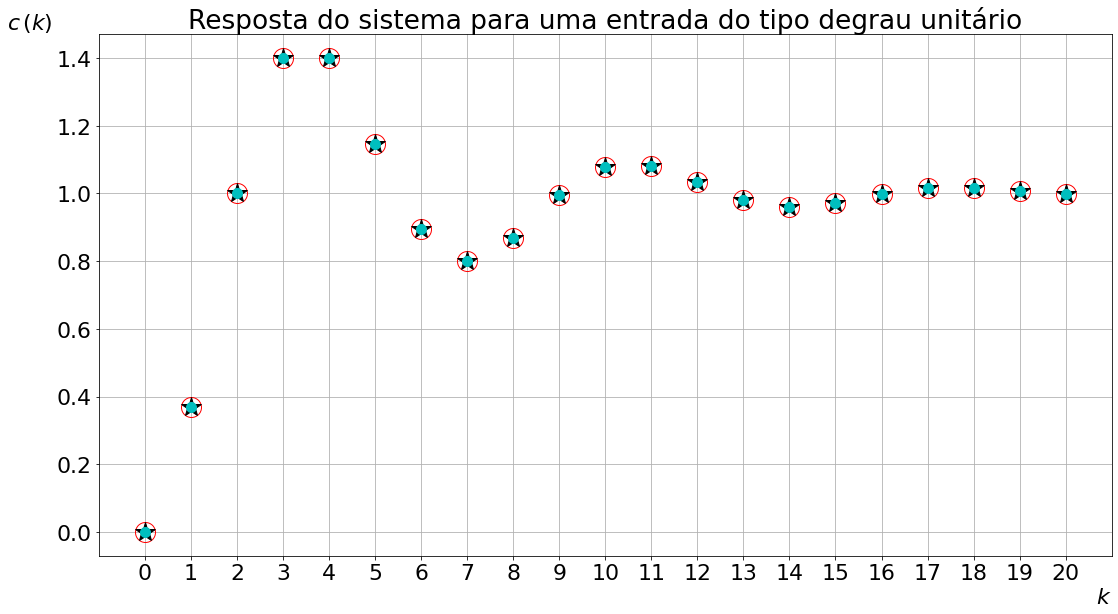

In [6]:
T = 1;
a = 1 - np.exp(-1);
a1 = 1 + np.exp(-1);
a2 = np.exp(-1);
b1 = np.exp(-1);
b2 = 1 - 2*np.exp(-1);
defs = {'e' : lcp.exp(1)};

tfinal = 20;
Kmax = int(tfinal/T+1);
k = np.linspace(0, tfinal, Kmax);

c = C(n,causal=True);
cs = (c.subs(defs)).seq(nvals=(0,Kmax)); # Resposta à uma entrada do tipo degrau unitário por meio da biblioteca lcapy
cs = cs.zeroextend();

recursiva = np.zeros(Kmax);
recursiva[0] = cs.as_array()[0];
recursiva[1] = cs.as_array()[1];
recursivaGz = np.copy(recursiva);
r = np.heaviside(k,1);
e = np.zeros(Kmax);

for i in range(2, Kmax):
    recursiva[i] = recursiva[i-1] - a*recursiva[i-2] + b1*r[i-1] + b2*r[i-2]; # Equação recursiva do sistema

    e[i-1] = r[i-1] - recursivaGz[i-1];                                       # Equação recursiva de G(z) e do somador
    e[i-2] = r[i-2] - recursivaGz[i-2];
    recursivaGz[i] = a1*recursivaGz[i-1] - a2*recursivaGz[i-2] + b1*e[i-1] + b2*e[i-2];

plt.plot(cs.n, cs.as_array(), 'ro', markerfacecolor='None', markersize=20);
plt.plot(k, recursiva, 'k*', markersize=20);
plt.plot(k, recursivaGz, 'c.', markersize=20);
plt.xticks(np.arange(min(k), max(k)+1, 1.0));
plt.title("Resposta do sistema para uma entrada do tipo degrau unitário");
plt.xlabel("$k$");
plt.ylabel("$c \, (k)$", rotation=0);
plt.grid();
plt.tight_layout();
plt.show();

# 6. Comparação entre os valores obtidos das curvas:

## Todas as expressões tiveram os mesmos resultados como pode ser observado na figura acima, aonde os pontos das curvas se coincidiram.